In [ ]:
#| hide 
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
from circadian import *

[![](https://img.shields.io/badge/docs-stable-blue.svg)](https://arcascope.github.io/circadian/)
![CI](https://github.com/Arcascope/circadian/actions/workflows/test.yaml/badge.svg)
[![Twitter](https://img.shields.io/twitter/url/https/twitter.com/arcascope.svg?style=social&label=Follow%20%40arcascope)](https://twitter.com/arcascope)

# Circadian

Welcome to `circadian`, a computational package for the simulation and analysis of circadian rhythms

## Install

`circadian` can be installed via `pip`:
```sh
pip install circadian
```

## Overview

The `circadian` package implements key mathematical models in the field such as: 

- `Forger99` - [Forger et al. (1999)](https://doi.org/10.1177/074873099129000867)
- `Hannay19` and `Hannay19TP` - [Hannay et al. (2019)](https://doi.org/10.1177/0748730419878298)
- `Jewett99` - [Kronauer et al. (1999)](https://doi.org/10.1177/074873049901400608)

See all the available models at [circadian/models.py](https://github.com/Arcascope/circadian/blob/main/circadian/models.py)

Additionally, `circadian` provides a set of tools for simulating and analzying circadian rhythms:

- Define light schedules using the `Light` class and feed directly into the models
- Calculate phase response curves using the `PRCFinder` class
- Generate actograms and phase plots with the `circadian.plots` module

Finally, the package streamlines the process of reading, processing, and analyzing wereable data via the `circadian.readers` module. 

Check out the [documentation](https://arcascope.github.io/circadian/) for a full overview of the package and its features.

## Example

The code below shows how to simulate the circadian rhythm of a shift worker for four different models and visualize the results in an actogram plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from circadian.plots import Actogram
from circadian.lights import LightSchedule
from circadian.models import Forger99, Jewett99, Hannay19, Hannay19TP

days_night = 3
days_day = 2
slam_shift = LightSchedule.ShiftWork(lux=300.0, days_on=days_night, days_off=days_day)

total_days = 30
time = np.arange(0, 24*total_days, 0.10)
light_values = slam_shift(time)

f_model = Forger99()
kj_model = Jewett99()
spm_model = Hannay19()
tpm_model = Hannay19TP()

equilibration_reps = 2
initial_conditions_forger = f_model.equilibrate(time, light_values, equilibration_reps)
initial_conditions_kj = kj_model.equilibrate(time, light_values, equilibration_reps)
initial_conditions_spm = spm_model.equilibrate(time, light_values, equilibration_reps)
initial_conditions_tpm = tpm_model.equilibrate(time, light_values, equilibration_reps)

The models are integrated using an explicit Runge-Kutta 4 (RK4) scheme

In [ ]:
trajectory_f = f_model(time, initial_conditions_forger, light_values)
trajectory_kj = kj_model(time, initial_conditions_kj, light_values)
trajectory_spm = spm_model(time, initial_conditions_spm, light_values)
trajectory_tpm = tpm_model(time, initial_conditions_tpm, light_values)

The Dim Light Melatonin Onset (DLMO), an experimental measurement of circadian phase, is calculated for each model by

In [ ]:
dlmo_f = f_model.dlmos()
dlmo_kj = kj_model.dlmos()
dlmo_spm = spm_model.dlmos()
dlmo_tpm = tpm_model.dlmos()

Lastly, the results of the simulation--DLMOs included-- are visualized in an `Actogram` plot from the `circadian.plots` module

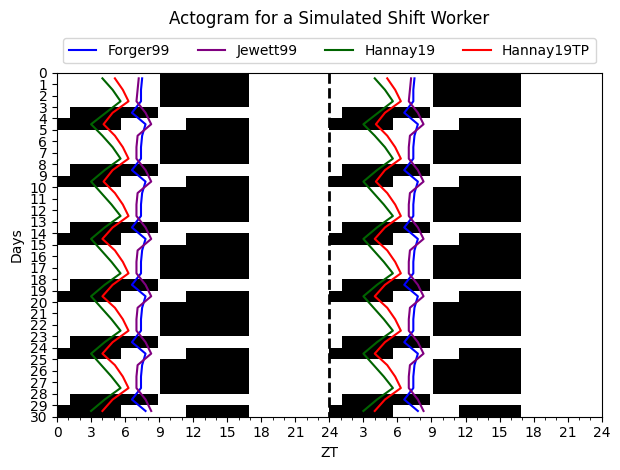

In [ ]:
acto = Actogram(time, light_vals=light_values, opacity=1.0, smooth=False)
acto.plot_phasemarker(dlmo_f, color='blue')
acto.plot_phasemarker(dlmo_spm, color='darkgreen')
acto.plot_phasemarker(dlmo_tpm, color='red')
acto.plot_phasemarker(dlmo_kj, color='purple')
# legend
blue_line = lines.Line2D([], [], color='blue', label='Forger99')
green_line = lines.Line2D([], [], color='darkgreen', label='Hannay19')
red_line = lines.Line2D([], [], color='red', label='Hannay19TP')
purple_line = lines.Line2D([], [], color='purple', label='Jewett99')

plt.legend(handles=[blue_line, purple_line, green_line, red_line], 
           loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=4)
plt.title("Actogram for a Simulated Shift Worker", pad=35)
plt.tight_layout()
plt.show()